Nesse curso, usaremos a base de dados do MNIST para aprender sobre CNN

In [1]:
# Importações
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Baixamos o dataset
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

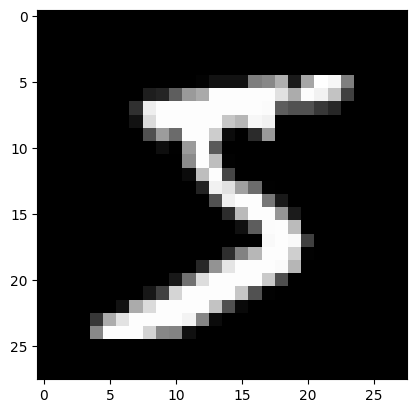

In [7]:
# Mostramos a imagem
image, label = dataset[0]
plt.imshow(image, cmap='gray')

In [8]:
import torchvision.transforms as transforms

PyTorch não é uma biblioteca para processamento de imagens, e sim de tensores. Portanto, precisamos converter a imagem em tensores.

In [9]:
dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# torch.Size([1, 28, 28]) 5 --> 1 canal de cor, 28x28 pixels que representa o 5

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


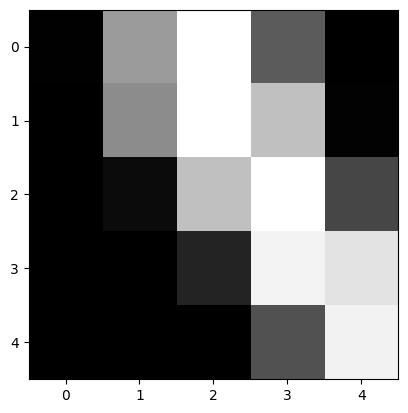

In [12]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Treinamento e Validação

Para construir modelos para aplicações reais de aprendizado de máquina, precisamos separar o dataset em 3 partes:

1. Treinamento: Usado para o treinamento do modelo;
2. Validação: Usado para validar o modelo durante o treinamento;
3. Teste: Usado para comparar diferentes resultados de modelos diferentes e medir a acurácia.

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# Modelo de regressão logística
model = nn.Linear(input_size, num_classes)

In [16]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0164, -0.0186, -0.0117,  ...,  0.0199, -0.0223, -0.0040],
        [ 0.0103, -0.0028,  0.0334,  ...,  0.0068, -0.0107, -0.0187],
        [-0.0344, -0.0287,  0.0074,  ...,  0.0282,  0.0172,  0.0015],
        ...,
        [-0.0331, -0.0142, -0.0280,  ...,  0.0039,  0.0124, -0.0043],
        [ 0.0119, -0.0085,  0.0101,  ...,  0.0039,  0.0053,  0.0328],
        [ 0.0024,  0.0125, -0.0248,  ...,  0.0106,  0.0158,  0.0169]],
       requires_grad=True)

In [17]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    images = images.reshape(batch_size, 784)
    outputs = model(images)
    break

tensor([7, 1, 5, 7, 1, 8, 3, 0, 5, 9, 4, 1, 9, 0, 8, 8, 3, 5, 5, 5, 8, 9, 8, 6,
        2, 5, 8, 8, 8, 1, 7, 3, 0, 3, 9, 5, 8, 1, 6, 1, 0, 1, 8, 6, 4, 3, 3, 2,
        0, 8, 8, 1, 2, 9, 3, 5, 1, 9, 7, 3, 6, 3, 8, 0, 6, 6, 2, 7, 7, 3, 7, 9,
        6, 4, 5, 2, 0, 4, 6, 6, 5, 7, 1, 5, 4, 6, 4, 3, 4, 2, 8, 2, 3, 9, 5, 7,
        0, 3, 9, 6, 1, 4, 9, 2, 6, 2, 3, 8, 3, 0, 3, 4, 4, 3, 1, 8, 5, 5, 1, 3,
        8, 4, 3, 5, 0, 1, 9, 3])
torch.Size([128, 1, 28, 28])


In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

Dentro do método `__init__`, instanciamos os pesos e bias utilizando `nn.Module`. E dentro do método `forward`, passamos o tensor com os pixels da imagem 28x28 com uma única dimensão. Dessa forma temos [28x28] --> [1x784]

In [19]:
model = MnistModel()

In [20]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [21]:
for images, labels in train_loader:
    outputs = model(images)
    break

print("outputs.shape : ", outputs.shape)
print("Sample outputs :\n", outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.3635, -0.1728, -0.1937, -0.3101,  0.1761,  0.1082,  0.5006,  0.0658,
          0.1108, -0.2008],
        [-0.0770, -0.0249, -0.0715, -0.0109,  0.2401,  0.0357,  0.2343,  0.1292,
          0.0199, -0.1860]])


In [22]:
import torch.nn.functional as F

In [23]:
# Aplicamos a função softmax em cada linha
probs = F.softmax(outputs, dim=1)

# Olhamos as probabilidades
print("Probabilidades dos exemplos:\n", probs[:2].data)

# Adicionamos as probabilidades em uma linha de saída
print("Soma: ", torch.sum(probs[0]).item())

Probabilidades dos exemplos:
 tensor([[0.1332, 0.0779, 0.0763, 0.0679, 0.1105, 0.1032, 0.1528, 0.0989, 0.1035,
         0.0758],
        [0.0892, 0.0940, 0.0897, 0.0953, 0.1225, 0.0998, 0.1218, 0.1096, 0.0983,
         0.0800]])
Soma:  1.0


Para determinarmos a predição, simplesmente escolhemos o valor máximo.

In [24]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 5, 6,
        6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 9, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6])
tensor([0.1528, 0.1225, 0.1479, 0.1402, 0.1239, 0.1867, 0.1554, 0.1471, 0.2010,
        0.2160, 0.1495, 0.1399, 0.1602, 0.1539, 0.2000, 0.1528, 0.1540, 0.1629,
        0.1265, 0.1835, 0.1441, 0.1285, 0.1206, 0.1601, 0.1486, 0.1424, 0.1608,
        0.1407, 0.1267, 0.1871, 0.1310, 0.1386, 0.1306, 0.1469, 0.1487, 0.1565,
        0.1371, 0.1166, 0.1625, 0.1260, 0.1315, 0.1556, 0.1304, 0.1308, 0.1479,
        0.1295, 0.1911, 0.1497, 0.1646, 0.1382, 0.1175, 0.1326, 0.1601, 0.1683,
        0.1613, 0.1561, 0.1324, 0.1178, 0.1863, 0.1558, 0.1582, 0.1566, 0.1667,
       

## Validação e Função de Perda

In [25]:
def accuracy(outputs, labels):
    # Pega o índice do maior valor
    _, preds = torch.max(outputs, dim=1)

    # Número de exemplos que foram classificados corretamente
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [26]:
torch.sum(preds == labels)

tensor(13)

In [27]:
accuracy(outputs, labels)

tensor(0.1016)

In [28]:
loss_fn = F.cross_entropy

In [29]:
# Perda para a batch atual de dados
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3372, grad_fn=<NllLossBackward0>)


In [30]:
e = torch.exp(torch.tensor(1.))

In [31]:
print(e**-loss)

# O modelo tem 9% de probabilidade de classificar corretamente a imagem antes do treinamento

tensor(0.0966, grad_fn=<PowBackward1>)


## Treinando o modelo

Abaixo temos um pseudocódigo para o treinamento

In [32]:
for epoch in range(0):
    # Fase de treinamento
    for batch in train_loader:
        # Geramos previsões
        # Calculamos a perda
        # Computamos os gradientes
        # Atualizamos os pesos
        # Resetamos os gradientes
        ...

    # Fase de validação
    for batch in val_loader:
        # Geramos previsões
        # Calculamos a perda
        # Computamos a métrica de desempenho
        ...

    # Calculamos a média da perda e da métrica de desempenho em todas as batches de treinamento

    # Registramos os valores de perda e métrica de desempenho para inspeção

In [33]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []  # Para armazenar os valores de perda e métrica de desempenho

    for epoch in range(epochs):
        # Fase de treinamento
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Fase de validação
        # result = []
        # for batch in val_loader:
        #     result.append(model.validation_step(batch))
        # model.validation_epoch_end(result)
        # history.append(result)
        
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [34]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Antes de treinar, precisamos adicionar os métodos de treinamento e validação na classe `MnistModel`

In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        return self.linear(xb)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Gera previsões
        return F.cross_entropy(out, labels)  # Calcula a perda

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  # Gera previsões
        loss = F.cross_entropy(out, labels)  # Calcula a perda
        acc = accuracy(out, labels)  # Calcula a acurácia
        return {"val_loss": loss.detach(), "val_acc": acc.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combina as perdas
        batch_accs = [x["val_acc"] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combina as acurácias
        return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print(
            "Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
                epoch + 1, result["val_loss"], result["val_acc"]
            )
        )

In [36]:
model = MnistModel()
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.2969322204589844, 'val_acc': 0.16356803476810455}

In [37]:
history0 = fit(1, 0.2, model, train_loader, val_loader)

Epoch [1], val_loss: 0.3728, val_acc: 0.8969


In [38]:
history1 = fit(5, 0.002, model, train_loader, val_loader)

Epoch [1], val_loss: 0.3677, val_acc: 0.8991
Epoch [2], val_loss: 0.3662, val_acc: 0.8994
Epoch [3], val_loss: 0.3653, val_acc: 0.9000
Epoch [4], val_loss: 0.3646, val_acc: 0.9002
Epoch [5], val_loss: 0.3639, val_acc: 0.9001


In [39]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [1], val_loss: 0.3636, val_acc: 0.9002
Epoch [2], val_loss: 0.3633, val_acc: 0.9002
Epoch [3], val_loss: 0.3631, val_acc: 0.9000
Epoch [4], val_loss: 0.3628, val_acc: 0.9004
Epoch [5], val_loss: 0.3625, val_acc: 0.9004


In [40]:
history3= fit(5, 0.0001, model, train_loader, val_loader)

# Final_1 -> 0.8938
# Final_2 -> 0.8918
# Final_3 -> 0.8978
# Final_4 -> 0.8963
# Final_5 -> 0.9005
# Final_6 -> 0.9004


Epoch [1], val_loss: 0.3625, val_acc: 0.9004
Epoch [2], val_loss: 0.3625, val_acc: 0.9004
Epoch [3], val_loss: 0.3624, val_acc: 0.9004
Epoch [4], val_loss: 0.3624, val_acc: 0.9004
Epoch [5], val_loss: 0.3624, val_acc: 0.9004


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

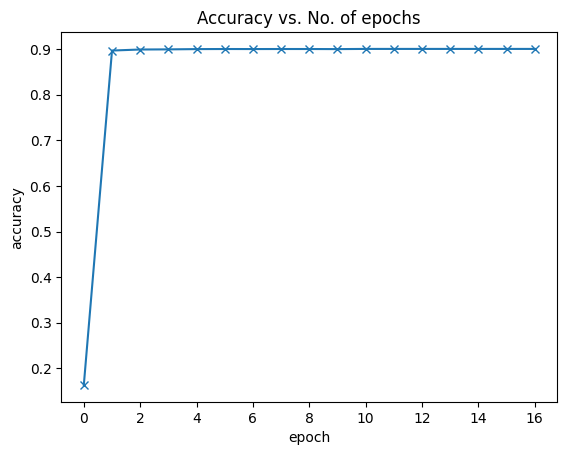

In [41]:
history = [result0] + history0 + history1 + history2 + history3
accuracies = [result["val_acc"] for result in history]
plt.plot(accuracies, "-x")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy vs. No. of epochs")

In [44]:
# Definimos o conjunto de testes
test_dataset = MNIST(root="data/", train=False, transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


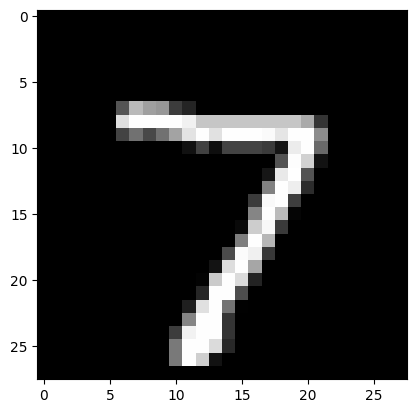

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap="gray")
print("Shape:", img.shape)
print("Label:", label)

In [54]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 5 , Predicted: 6


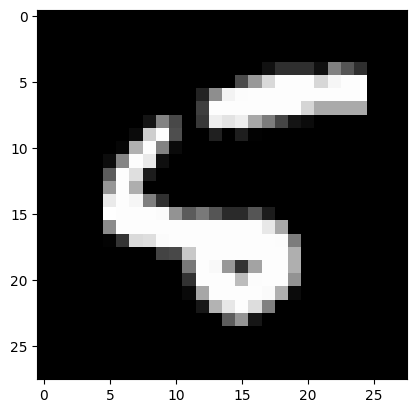

In [83]:
# Testamos o modelo
img, label = test_dataset[8]
plt.imshow(img[0], cmap="gray")
print("Label:", label, ", Predicted:", predict_image(img, model))

Label: 2 , Predicted: 8


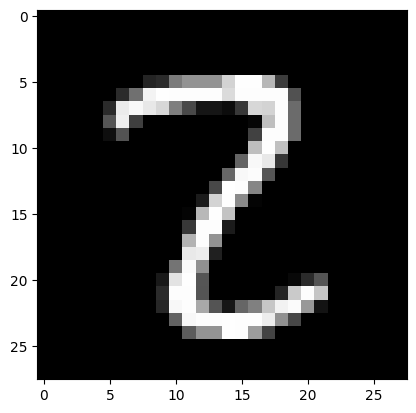

In [85]:
# Testamos o modelo
img, label = test_dataset[1839]
plt.imshow(img[0], cmap="gray")
print("Label:", label, ", Predicted:", predict_image(img, model))

In [90]:
batch_size = [128, 256, 512, 1024]

for i in batch_size:
    test_loader = DataLoader(test_dataset, i)
    result = evaluate(model, test_loader)
    print(result)

{'val_loss': 0.3377915322780609, 'val_acc': 0.9089201092720032}
{'val_loss': 0.3362191617488861, 'val_acc': 0.9092773199081421}
{'val_loss': 0.34508365392684937, 'val_acc': 0.9066060781478882}
{'val_loss': 0.3392128348350525, 'val_acc': 0.9084402918815613}


In [91]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0063,  0.0060,  0.0138,  ..., -0.0205,  0.0224,  0.0142],
                      [-0.0005,  0.0350, -0.0297,  ...,  0.0218,  0.0056,  0.0055],
                      [ 0.0157, -0.0089,  0.0109,  ..., -0.0230, -0.0003, -0.0282],
                      ...,
                      [ 0.0342, -0.0169,  0.0338,  ..., -0.0222, -0.0228, -0.0263],
                      [-0.0004,  0.0013,  0.0223,  ...,  0.0234,  0.0013,  0.0242],
                      [ 0.0051,  0.0229, -0.0131,  ..., -0.0259, -0.0326, -0.0079]])),
             ('linear.bias',
              tensor([-0.1052,  0.2290, -0.0299, -0.1145,  0.0620,  0.4073, -0.0083,  0.1904,
                      -0.5275, -0.0733]))])